# Análisis de regresión lineal multiple

In [1]:
# Instala librerias

pkg = c("tidyverse", "rstatix", "skimr", "psych", "ggpubr", "e1071")

for (i in pkg) {
  if(eval(bquote(!require(.(i))))) eval(bquote(install.packages(.(i))))
}

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: rstatix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rstatix’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’


Loading required package: skimr

# Ejercicio

Estudio con 72 estudiantes: se plantea que tanto el afrontamiento centrado en el problema como el centrado en la emoción predicen el estrés académico percibido.

Hipótesis de estudio: el afrontamiento centrado en el problema predice un menor estrés académico mientras que el centrado en la emoción predice un mayor estrés.

HT: el afrontamiento centrado en el problema es un predictor negativo y el afrontamiento centrado en la emoción es un predictor positivo del estrés académico.

- $H_{0}$: $β_{problema} = 0$, $β_{emocion} = 0$
- $H_{1}$: $β_{problema} < 0$, $β_{emocion} > 0$

Ecuación del modelo de regresión lineal múltiple:

Estrés académico = $β_{0} - β_{1}ACP + β_{2}ACE \pm \epsilon$ 

# Visualización de datos

In [2]:
data <- haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase9_BaseRegresionLinealSimpleYMultiple.sav")
data

Código,Sexo,Relación,HistVinc,Afroproblema,Afroemoción,Estrés_académico,ZRE_1
<chr>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
001,2,1,6,29.23077,38,45,1.051546027
002,2,0,7,23.84615,45,45,-0.554502312
003,2,0,8,24.61538,50,45,-1.437566240
004,2,0,5,21.53846,45,45,-0.686559040
005,2,1,8,30.00000,49,44,-1.224418179
006,2,1,6,33.07692,48,44,-0.862925974
007,1,0,6,31.53846,44,43,-0.489698396
008,1,1,11,21.53846,36,43,0.421388322
009,2,0,8,22.30769,35,43,0.650823799


`geom_smooth()` using formula = 'y ~ x'


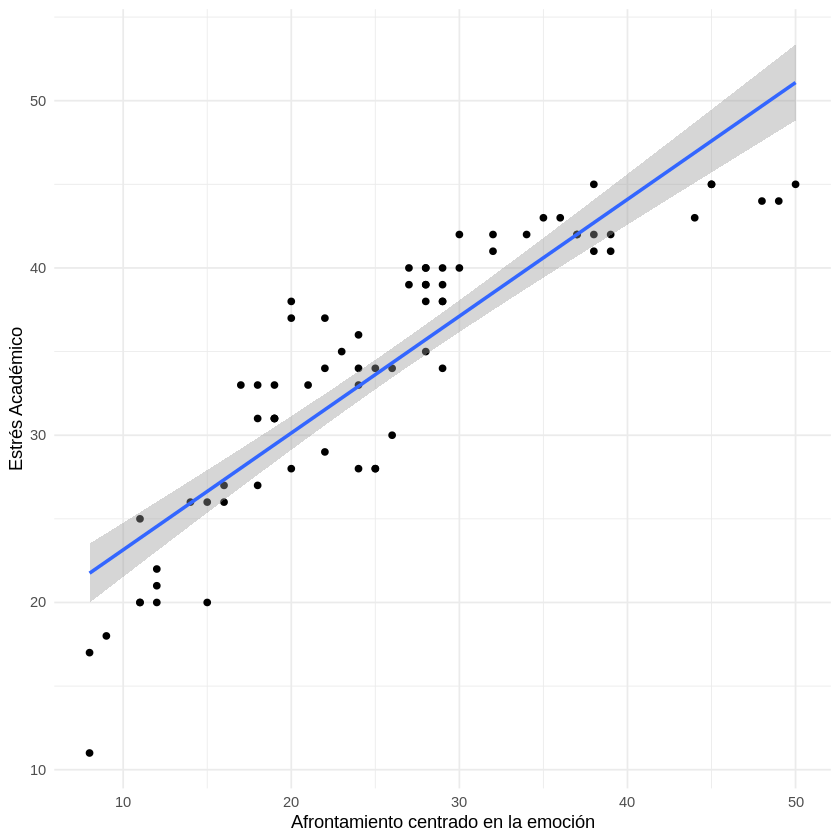

In [3]:
data |> 
  ggplot(aes(x = Afroemoción, y = Estrés_académico)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


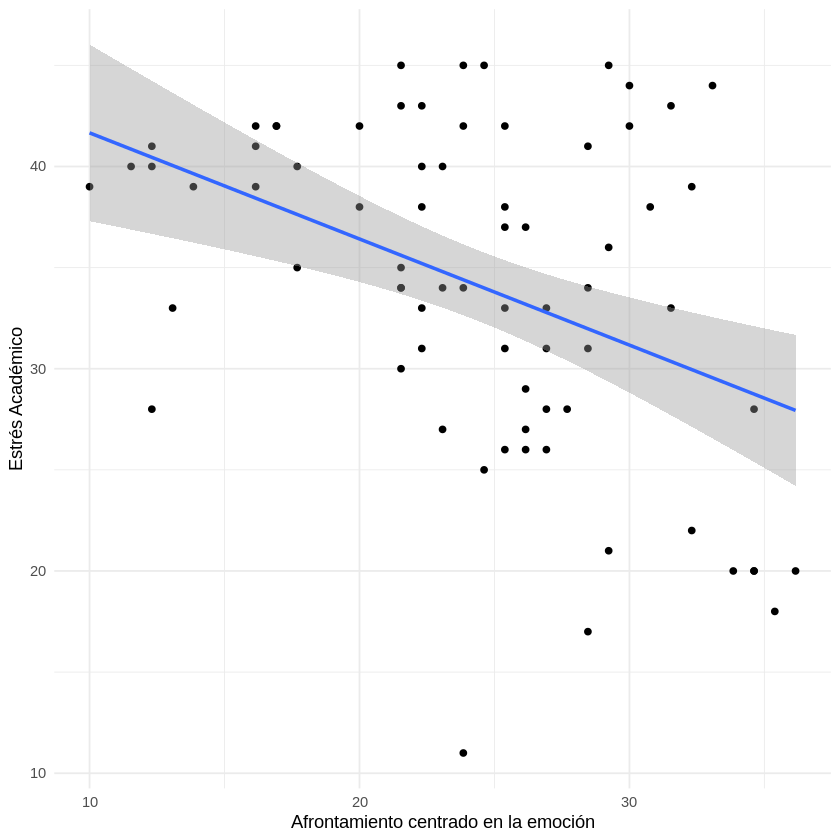

In [4]:
data |> 
  ggplot(aes(x = Afroproblema, y = Estrés_académico)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico") +
  theme_minimal()

# Verificación de supuestos

## Evaluar normalidad de distribuciones

In [6]:
library(rstatix)

data |> 
  shapiro_test(Estrés_académico, Afroemoción, Afroproblema) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Afroemoción,0.9712212,0.097620243,TRUE
Afroproblema,0.9741042,0.143365606,TRUE
Estrés_académico,0.9359159,0.001187091,FALSE


In [7]:
data |> 
  summarise(Asimetría = e1071::skewness(Estrés_académico, type = 2),
            Kurtosis = e1071::kurtosis(Estrés_académico, type = 2))

Asimetría,Kurtosis
<dbl>,<dbl>
-0.7121525,-0.2086931


El análisis de normalidad indica que las distribuciones de afrontamiento centrado en el problema, SW = .974, p = .143, y de afrontamiento centrado en la emoción, SW = .971, p = .098, son normales. Si bien la distribución de estrés académico no es normal, SW = .936, p = .001, de acuerdo a la asimetría y curtosis estandarizadas se puede considerar no problemática, por lo que se usará el índice de correlación paramétrico de Pearson.

https://www.ibm.com/support/pages/node/421769

# Evaluar evidencias de relación

In [8]:
data |> 
  select(Afroproblema, Afroemoción, Estrés_académico) |> 
  psych::corr.test()

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(data, Afroproblema, Afroemoción, 
    Estrés_académico))
Correlation matrix 
                 Afroproblema Afroemoción Estrés_académico
Afroproblema             1.00       -0.30            -0.41
Afroemoción             -0.30        1.00             0.89
Estrés_académico        -0.41        0.89             1.00
Sample Size 
[1] 72
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 Afroproblema Afroemoción Estrés_académico
Afroproblema             0.00        0.01                0
Afroemoción              0.01        0.00                0
Estrés_académico         0.00        0.00                0

 To see confidence intervals of the correlations, print with the short=FALSE option

Los resultados del análisis de correlación muestran una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.41, p < .001 (unilateral).

A su vez, se observa una relación estadísticamente significativa, positiva y grande, según el criterio de Cohen (1988), entre afrontamiento centrado en la emoción y estrés académico, r(70) = .89, p< .001 (unilateral).

Así, se cumple con el supuesto de linealidad entre las variables de estudio.

# Análisis del modelo

In [9]:
data %>%
  lm("Estrés_académico ~ Afroproblema + Afroemoción", data = .) -> model3

summary(model3)


Call:
lm(formula = "Estrés_académico ~ Afroproblema + Afroemoción", 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5111  -2.3226   0.1076   1.9249   8.9667 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.08760    2.33471   9.461 4.36e-14 ***
Afroproblema -0.20408    0.07022  -2.907  0.00491 ** 
Afroemoción   0.66126    0.04306  15.358  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.566 on 69 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8061 
F-statistic: 148.6 on 2 and 69 DF,  p-value: < 2.2e-16


# Verificación de supuestos

## Normalidad de residuos

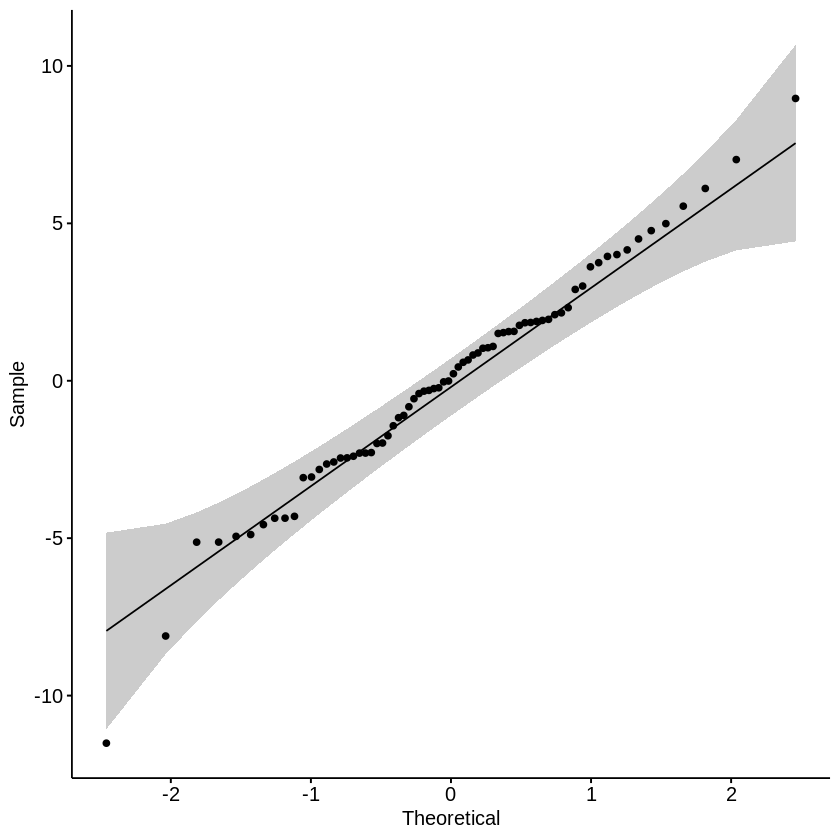

In [10]:
tibble(residuals = model3$residuals) |> 
  ggpubr::ggqqplot(x = "residuals")

In [11]:
model3$residuals |> 
  shapiro_test()

variable,statistic,p.value
<chr>,<dbl>,<dbl>
model3$residuals,0.9848906,0.5430686


La prueba de Shapiro-Wilk fue de SW = .985, p = .543, por lo que se puede decir que los residuos del modelo presentan distribución normal.

# Independencia o no multicolinealidad

In [14]:
car::vif(model3) %>% enframe()

name,value
<chr>,<dbl>
Afroproblema,1.096982
Afroemoción,1.096982


- Afrontamiento centrado en problemas: Tolerancia = .91 (> .20), VIF = 1.10 (< 3)
- Afrontamiento centrado en emoción:    Tolerancia = .91 (> .20), VIF = 1.10  (< 3)

Los resultados sugieren que ambas variables predictoras, afrontamiento centrado en el problema y centrado en la emoción, no tienen una relación lineal entre sí, por lo que se cumple con el supuesto de independencia de variables.

# Evaluación del modelo de regresión

In [15]:
summary(model3)


Call:
lm(formula = "Estrés_académico ~ Afroproblema + Afroemoción", 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5111  -2.3226   0.1076   1.9249   8.9667 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.08760    2.33471   9.461 4.36e-14 ***
Afroproblema -0.20408    0.07022  -2.907  0.00491 ** 
Afroemoción   0.66126    0.04306  15.358  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.566 on 69 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8061 
F-statistic: 148.6 on 2 and 69 DF,  p-value: < 2.2e-16


El coeficiente de determinación ajustado fue R2= .806, es decir, el 80.6% de la variación que se observa en estrés académico es explicado por el afrontamiento centrado en el problema y el centrado en la emoción. Según el criterio de Cohen (1988) el R2 es grande.

El resultado del análisis ANOVA fue F(2,69) = 148.56, p < .001, por lo que se puede decir que el modelo es adecuado. Al menos una de las VI es un predictor significativo del estrés académico.

El análisis de regresión lineal múltiple indica que el $β_{0}=22.09$, $β_{afront.problema}= -0.204$, $p=.002$ (unilateral) y $β_{afront.emoción}=0.661$, $p<.001$ (unilateral). 

En el caso del afrontamiento centrado en el problema se encontró que predice de manera inversa y significativa al estrés académico. A cada incremento de una unidad en afrontamiento problema se observa una disminución de 0.204 en estrés académico.

Por su parte, el afrontamiento centrado en la emoción predice de manera directa y significativa al estrés académico. Por cada unidad adicional de afrontamiento emoción, se observa un aumento de 0.661 en estrés académico. Por todo ello se concluye que se cumple la HT de las investigadoras.

Estrés académico = 22.09 - 0.204(afrontamiento problema) + 0.661(afrontamiento emoción) + 3.57

In [16]:
data |> 
  select(Afroproblema, Afroemoción, Estrés_académico) |> 
  mutate(across(everything(), scale)) %>%
  lm("Estrés_académico ~ Afroproblema + Afroemoción", data = .) -> model3_std

model3_std %>% summary()


Call:
lm(formula = "Estrés_académico ~ Afroproblema + Afroemoción", 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42138 -0.28680  0.01328  0.23768  1.10720 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.964e-16  5.190e-02   0.000  1.00000    
Afroproblema -1.591e-01  5.474e-02  -2.907  0.00491 ** 
Afroemoción   8.407e-01  5.474e-02  15.358  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4404 on 69 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8061 
F-statistic: 148.6 on 2 and 69 DF,  p-value: < 2.2e-16


De acuerdo a los betas estandarizados, el afrontamiento centrado en la emoción es más importante que el afrontamiento centrado en el problema en el modelo de predicción del estrés académico. 

$β_{afront.emoción} = .841 > β_{afront.problema} = .159$ 